## Econ 441B 

### Xiaomeng Leng

In [2]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [3]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [4]:
y.index = y.name

In [5]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [6]:
y.index = pd.to_datetime(y.index)

In [7]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [8]:
from pytrends.request import TrendReq

In [170]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ['September', 'Release', 'Apple Watch', 'Apple', 'MacBook Air', 'Airpods', 'Westfield', 'May', 'Ivor']  
            # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [171]:
df = df.resample("Q").mean()

In [172]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [117]:
from sklearn.preprocessing import StandardScaler

In [173]:
scaler = StandardScaler()

In [174]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [15]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [175]:
lasso = Lasso(alpha=0.05)

In [176]:
las = lasso.fit(X_scaled, y)

In [177]:
coefficients = las.coef_

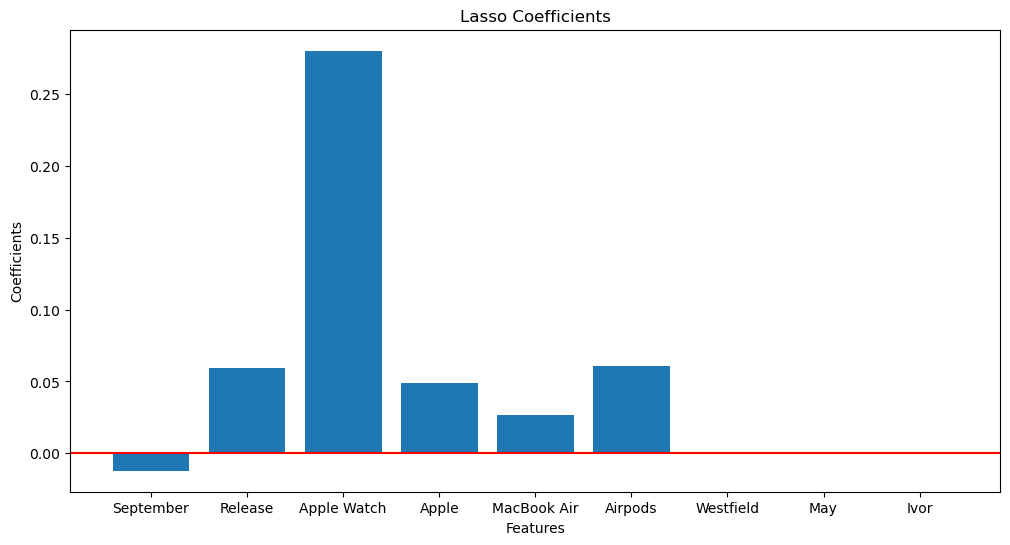

In [178]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.axhline(0, color="red")
plt.title('Lasso Coefficients')
plt.xticks(range(len(coefficients)), X.columns)
plt.show()



# 5.) Do these coefficient magnitudes make sense?

The bar chart shows that the coefficients of a regression model where the independent variables are "September", 'Release', 'Apple Watch', 'Apple', 'MacBook Air', 'Airpods', 'Westfield', 'May', and'Ivor'. The dependent variable is "BasicEPS".  

The terms  'Apple Watch','Release','Apple', 'MacBook Air','Airpods', Features show positive coefficients. 

'Release': Positive coefficient; indicates a strong correlation between searches for new Apple product releases and an increase in Apple's earnings, likely due to consumer purchases following these events.

'Apple Watch': Has a positive coefficient, suggesting that searches for the Apple Watch are positively correlated with Apple's earnings, likely because interest in this product can lead to direct sales.

'Apple': Positive coefficient; general searches for Apple could indicate overall market interest in the company's products, which correlates with increased earnings.

'MacBook Air': Positive coefficient; indicates that consumer interest in the MacBook Air, as reflected by search volume, is positively associated with Apple's earnings.

'Airpods': This term has a positive coefficient, indicating a positive correlation with earnings, which makes sense as AirPods are a popular product and searches could indicate buying intent.



'September': Shows a negative coefficient, which could imply that searches for Apple in September negatively correlate with Apple's earnings, possibly because consumers might be waiting for announcements of new products before making purchases.

The terms 'Westfield', 'May', and 'Ivor' seem unrelated to Apple's earnings, which is consistent with their zero coefficients. 'Westfield' refer to a shopping center, 'May' is a month that doesn't align with Apple's typical release schedule, and 'Ivor' does not seem to have any clear connection to Apple or its product offerings.



In summary, the non-zero coefficients on search terms that are directly related to Apple's product releases and peak interest periods seem logical. The zero coefficients on less relevant terms also make sense as they would be expected to have little or no predictive power on Apple's earnings.